## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

## Metadata

#### Attribute 1: (qualitative)
- Status of existing checking account  
A11 : ... < 0 DM  
A12 : 0 <= ... < 200 DM  
A13 : ... >= 200 DM / salary assignments for at least 1 year  
A14 : no checking account

#### Attribute 2: (numerical)  
- Duration in month

#### Attribute 3: (qualitative)  
- Credit history  
A30 : no credits taken/ all credits paid back duly  
A31 : all credits at this bank paid back duly  
A32 : existing credits paid back duly till now  
A33 : delay in paying off in the past  
A34 : critical account/ other credits existing (not at this bank)

#### Attribute 4: (numerical)
- Credit amount

#### Attibute 5: (qualitative)
- Savings account/bonds  
A61 : ... < 100 DM  
A62 : 100 <= ... < 500 DM  
A63 : 500 <= ... < 1000 DM  
A64 : .. >= 1000 DM  
A65 : unknown/ no savings account

#### Attribute 6: (qualitative)
- Present employment since  
A71 : unemployed  
A72 : ... < 1 year  
A73 : 1 <= ... < 4 years  
A74 : 4 <= ... < 7 years  
A75 : .. >= 7 years

#### Attribute 7: (numerical)
- Installment rate in percentage of disposable income

#### Attribute 8: (qualitative)
- Personal status and sex  
A91 : male : divorced/separated  
A92 : female : divorced/separated/married  
A93 : male : single  
A94 : male : married/widowed  
A95 : female : single

#### Attribute 9: (numerical)
- Present residence since

#### Attribute 10: (numerical)
- Age in years

#### Attribute 11: (qualitative)
- Other installment plans  
A141 : bank  
A142 : stores  
A143 : none

#### Attribute 12: (numerical)
- Number of existing credits at this bank

#### Attribute 13: (qualitative)
- Job  
A171 : unemployed/ unskilled - non-resident  
A172 : unskilled - resident  
A173 : skilled employee / official  
A174 : management/ self-employed/highly qualified employee/ officer

## Reading Data

In [27]:
df = pd.read_csv('German Credit Data.csv')
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


## Checking Null Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


#### No Null Values Found

## Checking Relationships

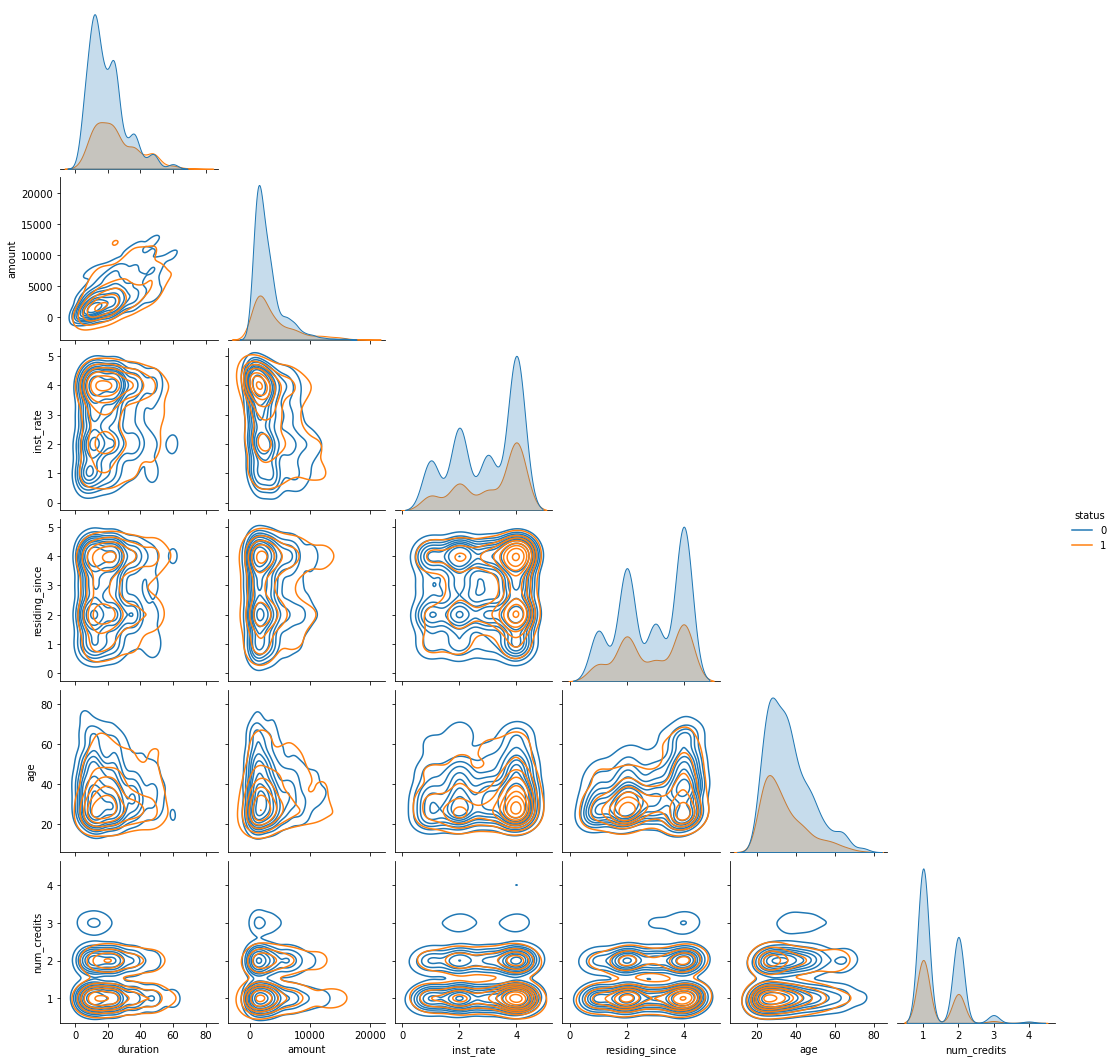

In [5]:
df_num = pd.concat([df[numeric],df['status']],axis=1)
sns.pairplot(data=df_num,
             hue = 'status',
             corner=True,
             kind='kde')

## Creating Pipelines

In [6]:
ordinal_pipeline = Pipeline([
    ('encoder_o', OrdinalEncoder()) 
])
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

## Scaling Data
(note that using column transformer followed by cross validation ensures that there is no data leakage)

In [4]:
numeric = df.select_dtypes(exclude='object').drop(columns='status').columns
ordinal = df.select_dtypes(include='object').columns

In [7]:
preprocessing_pipeline = ColumnTransformer([
    ('ordinal_preprocessor', ordinal_pipeline, ordinal),
    ('numerical_preprocessor', numerical_pipeline, numeric)
])

## Train Test Split

In [8]:
X = pd.concat([df[numeric],df[ordinal]] , axis=1)
y = df['status']
X.head()

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc,credit_history,savings_acc,present_emp_since,personal_status,inst_plans,job
0,6,1169,4,4,67,2,A11,A34,A65,A75,A93,A143,A173
1,48,5951,2,2,22,1,A12,A32,A61,A73,A92,A143,A173
2,12,2096,2,3,49,1,A14,A34,A61,A74,A93,A143,A172
3,42,7882,2,4,45,1,A11,A32,A61,A74,A93,A143,A173
4,24,4870,3,4,53,2,A11,A33,A61,A73,A93,A143,A173


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

## Create a Baseline model
(I will use this model to check the efficiency of GridSearchCV)

### Model Pipeline

In [10]:
model_base = Pipeline([
    ('Preprocessor',preprocessing_pipeline),
    ('Model_Decision_Tree', DecisionTreeClassifier(random_state=42))
])

### Model Accuracy using Cross Validation
~67.25%

In [11]:
scores = cross_val_score(model_base, X = X_train , y = y_train , cv = 10, )
scores.mean()

0.6725

### Model Fitting

In [29]:
model_base.fit(X_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('ordinal_preprocessor',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder())]),
                                                  Index(['checkin_acc', 'credit_history', 'savings_acc', 'present_emp_since',
       'personal_status', 'inst_plans', 'job'],
      dtype='object')),
                                                 ('numerical_preprocessor',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits'],
      dtype='object'))])),
                ('Model_Decision_Tree',
                 DecisionTreeClassifier(random_state=42))])

## GridSearchCV

### Create a Parameter Dictionary for Parameter Search

In [13]:
para_dict = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : range(1,20),
    'min_samples_split' : range(2,10),
    'min_samples_leaf' : range(1,10)
}

### Create a pipeline for Data Preperation and the use Cross Validation for Grid Search

In [14]:
model_gridsearch = Pipeline([
    ('Preprocessor',preprocessing_pipeline),
    ('GridSearchCV',GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                 param_grid=para_dict,
                                 scoring='roc_auc',
                                 cv = 10,
                                 refit=True))])

### Perform Grid Search

In [15]:
model_gridsearch.fit(X_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('ordinal_preprocessor',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder())]),
                                                  Index(['checkin_acc', 'credit_history', 'savings_acc', 'present_emp_since',
       'personal_status', 'inst_plans', 'job'],
      dtype='object')),
                                                 ('numerical_preprocessor',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits'],
      dtype='object'))])),
                ('GridSearchCV',
                 GridSearchCV(cv=10,
                              estimator=DecisionT

## Obtain Best Parameters

In [16]:
best_params = model_gridsearch['GridSearchCV'].best_params_
best_params

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'random'}

In [17]:
best_params['random_state'] = 42

## Train Model now using Best Parameters

In [18]:
best_model = Pipeline([
    ('Preprocessor',preprocessing_pipeline),
    ('DecisionTreeClassifier', DecisionTreeClassifier(**best_params))
])

In [19]:
best_model.fit(X_train,y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('ordinal_preprocessor',
                                                  Pipeline(steps=[('encoder_o',
                                                                   OrdinalEncoder())]),
                                                  Index(['checkin_acc', 'credit_history', 'savings_acc', 'present_emp_since',
       'personal_status', 'inst_plans', 'job'],
      dtype='object')),
                                                 ('numerical_preprocessor',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits'],
      dtype='object'))])),
                ('DecisionTreeClassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=7,
   

### Accuracy
- We see a 10% increase in accuracy

In [20]:
best_model.score(X_test,y_test)

0.78

## Tree Visualization

In [21]:
!pip install graphviz

In [22]:
import graphviz

### Obtain dot data file for the decision rules

In [23]:
dot_data = tree.export_graphviz(best_model['DecisionTreeClassifier'], 
                                feature_names=X_train.columns,  
                                class_names=['Defaulter','Not Defaulter'],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                out_file=None)

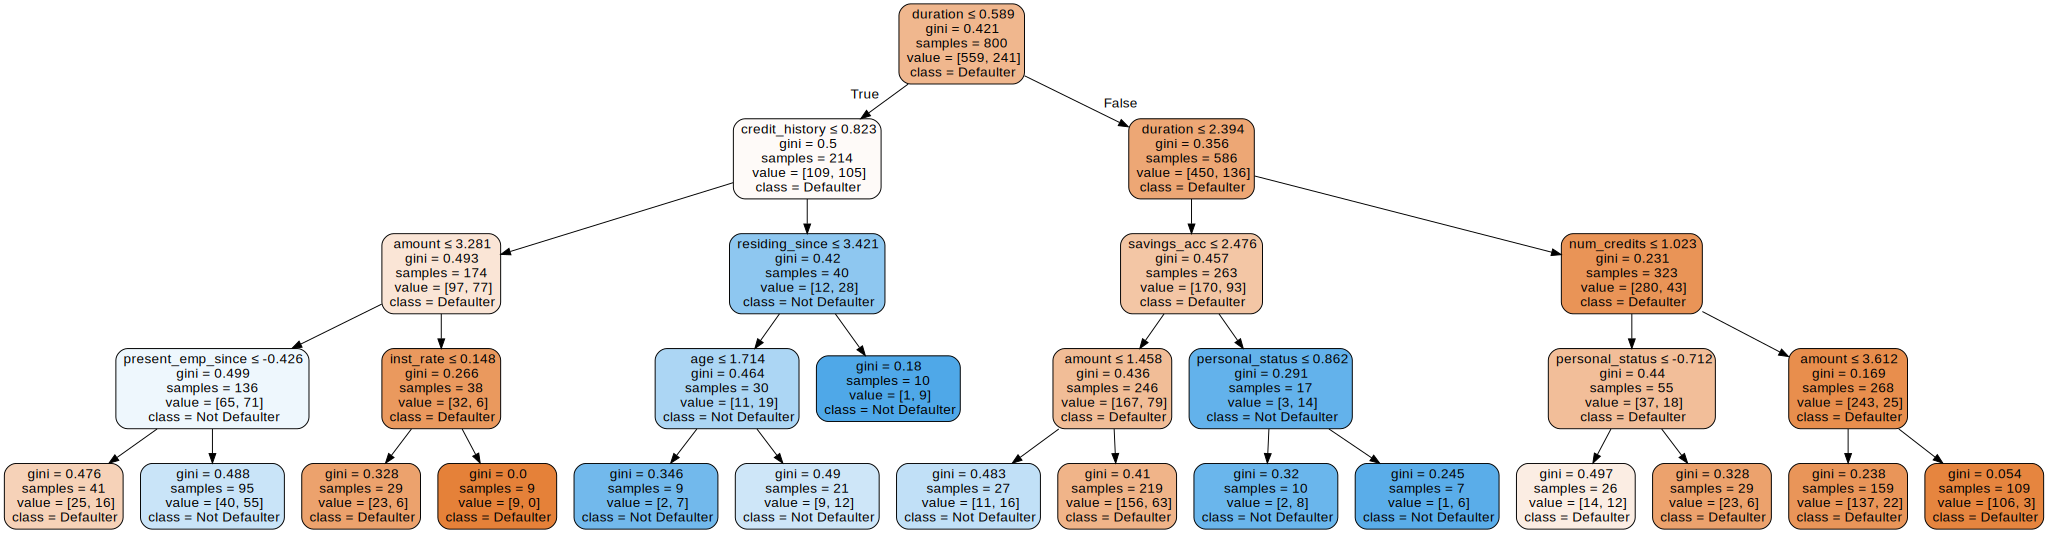

In [24]:
graph = graphviz.Source(dot_data,)
graph

### Saving Decision Rules

In [25]:
g = graphviz.Source(source=dot_data,format='png') 

In [26]:
g.save()
g.render(filename='best_model_graph', view=0, cleanup=1)

'best_model_graph.png'

## Text Representation of Decision Rules

In [43]:
ls = ['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'checkin_acc', 'credit_history', 'savings_acc',
       'present_emp_since', 'personal_status', 'inst_plans', 'job']

In [44]:
text_representation = tree.export_text(best_model['DecisionTreeClassifier'] , feature_names= ls)
print(text_representation)

|--- duration <= 0.59
|   |--- credit_history <= 0.82
|   |   |--- amount <= 3.28
|   |   |   |--- present_emp_since <= -0.43
|   |   |   |   |--- class: 0
|   |   |   |--- present_emp_since >  -0.43
|   |   |   |   |--- class: 1
|   |   |--- amount >  3.28
|   |   |   |--- inst_rate <= 0.15
|   |   |   |   |--- class: 0
|   |   |   |--- inst_rate >  0.15
|   |   |   |   |--- class: 0
|   |--- credit_history >  0.82
|   |   |--- residing_since <= 3.42
|   |   |   |--- age <= 1.71
|   |   |   |   |--- class: 1
|   |   |   |--- age >  1.71
|   |   |   |   |--- class: 1
|   |   |--- residing_since >  3.42
|   |   |   |--- class: 1
|--- duration >  0.59
|   |--- duration <= 2.39
|   |   |--- savings_acc <= 2.48
|   |   |   |--- amount <= 1.46
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  1.46
|   |   |   |   |--- class: 0
|   |   |--- savings_acc >  2.48
|   |   |   |--- personal_status <= 0.86
|   |   |   |   |--- class: 1
|   |   |   |--- personal_status >  0.86
|   |   |   | 